
- pickling


In [2]:
a = {'a':1, 'b':2}

with open('temp.p','wb') as f:
    f.write(a)
# 문자열로 해야되서 에러남

TypeError: a bytes-like object is required, not 'dict'

In [3]:
import pickle

with open('temp.p','wb') as f:
    pickle.dump(a,f)

In [4]:
with open('temp.p','rb') as f:
    x = pickle.load(f)
# 객체로 가지고 옴
x

{'a': 1, 'b': 2}

In [5]:
import numpy as np
b = np.array([1,2,3])
np.save('f',b)  # npy파일

In [8]:
c = np.load('f.npy')
c

array([1, 2, 3])

In [ ]:
np.savez('f',b) # zip

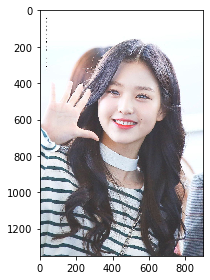

In [9]:
import matplotlib.pyplot as plt
from skimage import io
img = io.imread('1.jpg')
io.imshow(img)

In [13]:
# skimage.util : 전처리 이미지
from skimage.util import crop

# from skimage.data import camera -> 연습용 데이터

convolution으로 크기,위치 상관없는 특징을 뽑음 -> 데이터가 많이 필요

데이터가 없을 경우 crop할때 유의해야 함.(중앙에 잘라야함!)

In [10]:
img.shape

(1350, 900, 3)

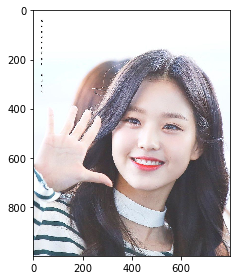

In [11]:
io.imshow(img[:1000,:800,:])

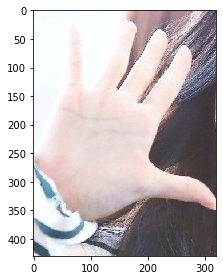

In [27]:
io.imshow(crop(img,((370,550),(0,580),(0,0))))  # 아래와 오른쪽 기준으로 잘린 듯

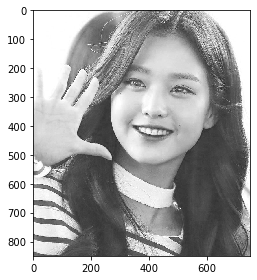

In [24]:
io.imshow(crop(img,((200,300),(50,100),(2,0))))  # 상하좌우 자르기

- DPI : inch당 dot
- PPI : inch당 pixel
- 커질수록 선명해진다.



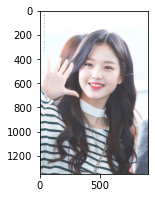

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(img)  # 3인치당 shape만큼을 보여주는 것이라 할 수 있다.

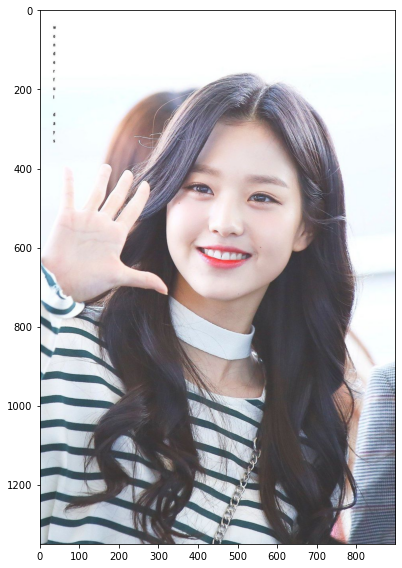

In [36]:
plt.figure(figsize=(8,8))
io.imshow(img, interpolation = None)
# option : nearest, None, sinc

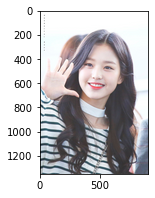

In [38]:
plt.figure(figsize=(3,3))
grid = 
plt.imshow(img, interpolation = 'spline36') # resize할때 option을 잘 선택해야 함
# error나면 option볼 수 있다.

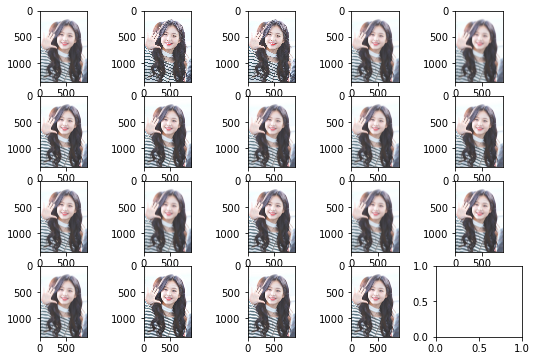

In [39]:
options = ['antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman']
fig, axe = plt.subplots(4,5,figsize=(9,6))
for ax,op in zip(axe.flat, options):
    ax.imshow(img, interpolation = op)
    

# 사이즈에 따라 다르게 나올 수도

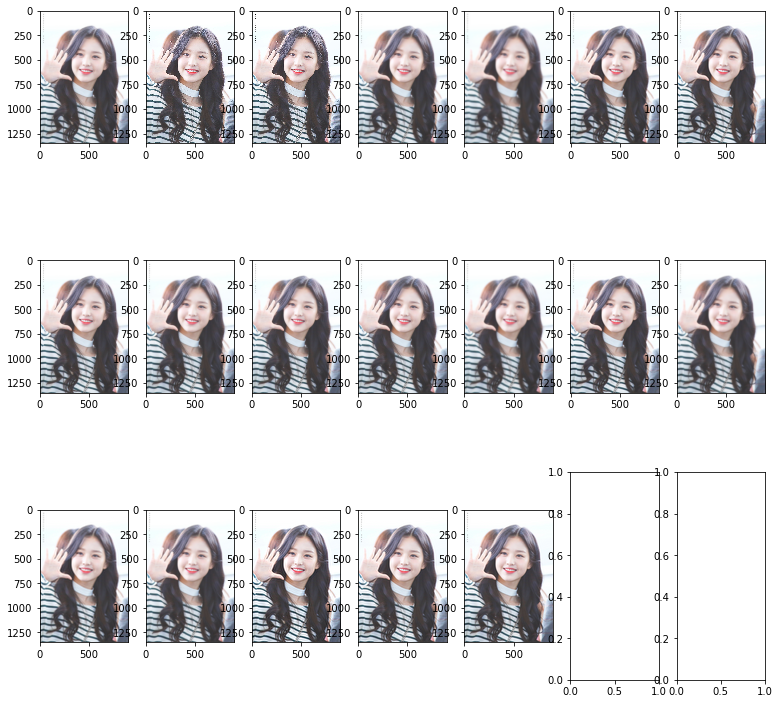

In [40]:
fig, axe = plt.subplots(3,7,figsize=(13,13))
for ax,op in zip(axe.flat, options):
    ax.imshow(img, interpolation = op)

## resize

In [41]:
import skimage
skimage.lookfor('resize') # resize 찾기

Search results for 'resize'
---------------------------
skimage.transform.resize
    Resize image to match a certain size.
skimage.viewer.ImageViewer.resize
    resize(self, int, int)
skimage.viewer.CollectionViewer.resize
    resize(self, int, int)
skimage.viewer.ImageViewer.resizeDocks
    
skimage.viewer.CollectionViewer.resizeDocks
    
skimage.viewer.plugins.Crop.resize
    resize(self, int, int)
skimage.viewer.plugins.Measure.resize
    resize(self, int, int)
skimage.viewer.plugins.Crop.resizeEvent
    
skimage.viewer.plugins.Plugin.resize
    resize(self, int, int)
skimage.viewer.widgets.Text.resize
    resize(self, int, int)
skimage.viewer.widgets.Slider.resize
    resize(self, int, int)
skimage.viewer.widgets.Button.resize
    resize(self, int, int)
skimage.viewer.plugins.LineProfile.resize
    resize(self, int, int)
skimage.viewer.plugins.LabelPainter.resize
    resize(self, int, int)
skimage.viewer.plugins.PlotPlugin.resize
    resize(self, int, int)
skimage.viewer.plugins.C

In [42]:
from skimage.transform import resize, rescale

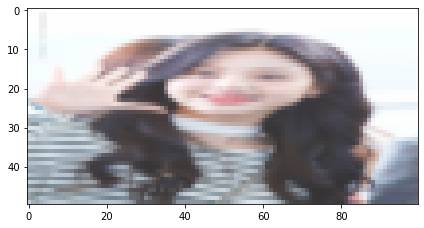

In [43]:
io.imshow(resize(img,(50,100))) # output 크기

In [48]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[199, 218, 224],
        [186, 205, 211],
        [178, 195, 202],
        ...,
        [ 76,  79,  98],
        [ 76,  79,  98],
        [ 78,  81, 100]],

       [[196, 215, 221],
        [186, 205, 211],
        [194, 211, 218],
        ...,
        [109, 112, 131],
        [105, 108, 127],
        [103, 106, 125]],

       [[168, 187, 193],
        [146, 165, 171],
        [174, 191, 198],
        ...,
        [129, 132, 151],
        [121, 124, 143],
        [116, 119, 138]]

In [47]:
resize(img,(50,100))
# 0~1사이 값이 됨 -> normalization

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.58431373, 0.64313725, 0.67058824],
        [0.52156863, 0.58039216, 0.59607843],
        [0.48235294, 0

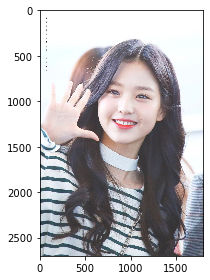

In [46]:
io.imshow(rescale(img,(2,2,1) )) # xy로 배수가됨

## 뒤집은 이미지 출력

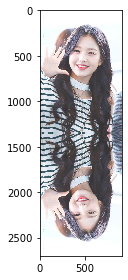

In [66]:
io.imshow(np.vstack((img, img[::-1])))

In [59]:
img.shape

(1350, 900, 3)

1. slicing

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


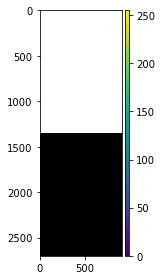

In [62]:
new_image = np.zeros((img.shape[0]*2, img.shape[1], img.shape[2]))
new_image[:1350,:,:] = img
io.imshow(new_image)  # dtype이 달라서 안나옴...

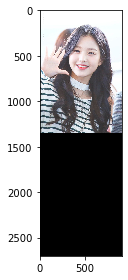

In [63]:
new_image = np.zeros((img.shape[0]*2, img.shape[1], img.shape[2]), dtype = 'uint8')
new_image[:1350,:,:] = img
io.imshow(new_image)

In [65]:
y = np.arange(10).reshape(2,5)
y[:,::-1]

array([[4, 3, 2, 1, 0],
       [9, 8, 7, 6, 5]])

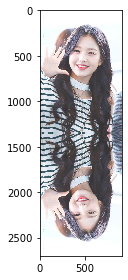

In [67]:
new_image[1350:] = img[::-1]
io.imshow(new_image)

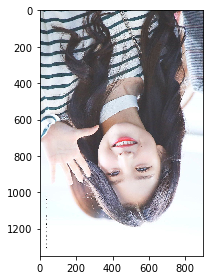

In [76]:
io.imshow(np.flip(img,0))
# ud, lr

In [77]:
import PIL 
# tensorflow, keras, pytorch 의 기본적인 영상처리 내부 모듈

In [81]:
from PIL import Image
jang = Image.open('1.jpg')# 이미지 자체를 보여줌
type(jang)

PIL.JpegImagePlugin.JpegImageFile

In [83]:
dir(jang)  # __array_interface__ : numpy 호환 , 

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_description',
 'fp'

In [89]:
jang2 = np.array(jang)
jang3 = Image.fromarray(jang2)
# jang3

# PIL

In [88]:
jang.size # 가로, 세로임

(900, 1350)

In [92]:
# jang.convert('L')

### color space 
- 색상 channel
    - RGB : Red,Green,Blue
    - CYMK : Cyon, Yellow, Magenta, Black (흑백) 
- color space에 따라서 channel, 개수 결정

- color space, channel로 결정된 color intensity가 들어감
- pixel은 위치

In [100]:
np.array(jang)[0][0]  # RGB 순서

array([255, 255, 255], dtype=uint8)

In [97]:
jang.mode  # colorspace를 알려줌

'RGB'

#### channel

- RGB(PIL)
- BGR(opencv)

In [98]:
np.array(jang)[:,:,0] # R값만 뽑기

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [199, 186, 178, ...,  76,  76,  78],
       [196, 186, 194, ..., 109, 105, 103],
       [168, 146, 174, ..., 129, 121, 116]], dtype=uint8)

In [103]:
a,b,c = jang.split()
np.array(a)  # 위와 같음

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [199, 186, 178, ...,  76,  76,  78],
       [196, 186, 194, ..., 109, 105, 103],
       [168, 146, 174, ..., 129, 121, 116]], dtype=uint8)

In [ ]:
jang.convert('L').convert('RGB')  # 색공간이 1:1로 매칭되지 않으면 안될수도
# CYMK : 흑백..?

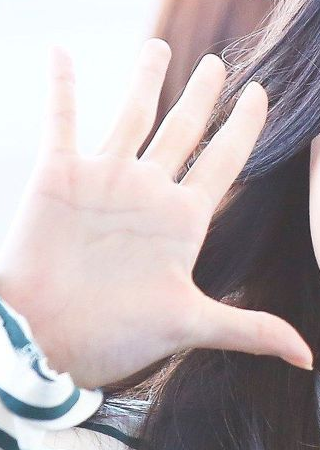

In [112]:
jang.crop((10,350,330,800))  # 왼위 오른 아래

In [114]:
list(jang.getdata())

[(255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255

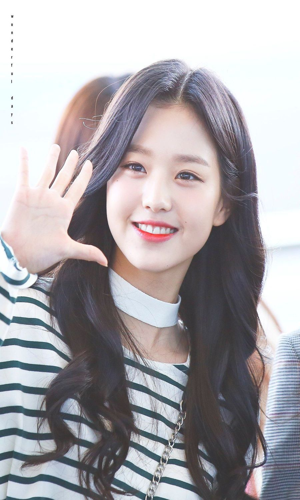

In [117]:
t = jang.resize((300,500))
t

### getdata

- seqence 라 indexing, slicing 가능
- iterable
- 하나의 collection을 차례대로 접근 가능한 데이터 포맷 
- 데이터 관리하는 포맷을 flatten해서 접근하도록 고유 type 만듬.
    - Numpy는 내부적으로 1차원
    -  **stride**

In [1]:
from PIL import Image
jang = Image.open('1.jpg')
jang.getdata()

In [ ]:
for i in jang.getdata(): #sequence data
#     print(i)

#list(jang.getdata())

### strides

- 2차원 이상은 axis이용 
- memory address가 axis를 가리켜 shape 조정하기

</br>

- row : 12 memory 다음 주소  
- column : 4
- stides로 2차원 표현

In [7]:
import numpy as np
a=np.arange(6).reshape(3,2)
a.strides

(8, 4)

### ImageFilter

- Gaussian Blur filter 적용

In [8]:
from PIL import ImageFilter
dir(ImageFilter)

['BLUR',
 'BoxBlur',
 'BuiltinFilter',
 'CONTOUR',
 'Color3DLUT',
 'DETAIL',
 'EDGE_ENHANCE',
 'EDGE_ENHANCE_MORE',
 'EMBOSS',
 'FIND_EDGES',
 'Filter',
 'GaussianBlur',
 'Kernel',
 'MaxFilter',
 'MedianFilter',
 'MinFilter',
 'ModeFilter',
 'MultibandFilter',
 'RankFilter',
 'SHARPEN',
 'SMOOTH',
 'SMOOTH_MORE',
 'UnsharpMask',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'functools',
 'numpy']

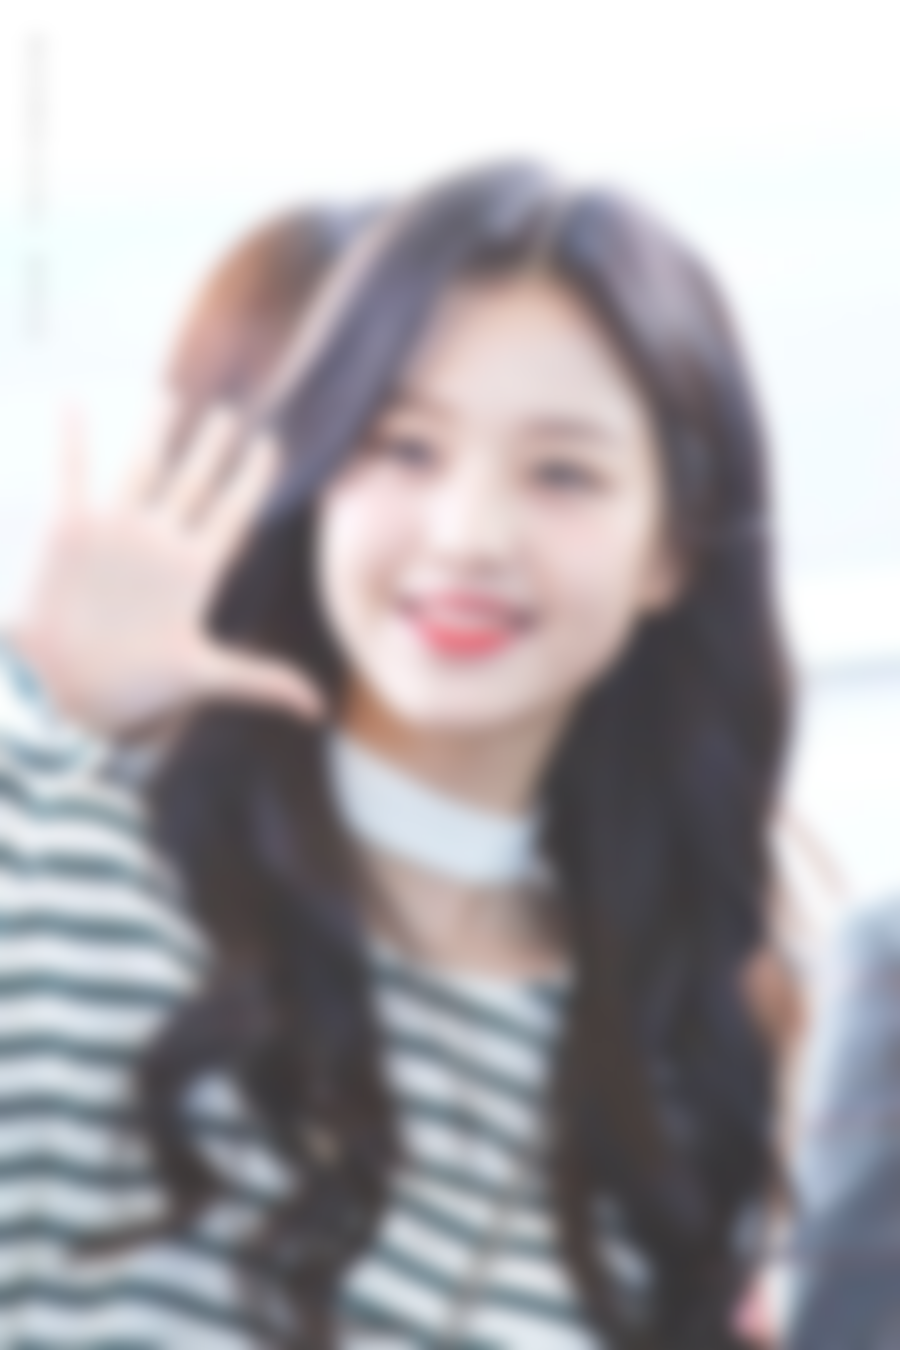

In [10]:
jang.filter(ImageFilter.GaussianBlur(10))

In [15]:
# jang.filter(ImageFilter.EMBOSS())

In [17]:
import inspect
print(inspect.getsource(ImageFilter.MultibandFilter))

# 모양만 만들어 내부적 구현

class MultibandFilter(Filter):
    pass



In [16]:
print(inspect.getsource(ImageFilter.Filter))

class Filter:
    pass



In [18]:
dir(ImageFilter.MedianFilter())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'filter',
 'name',
 'rank',
 'size']

In [24]:
t = jang.resize((300,500))
t.paste(jang)

### ImageDraw

그림 그리기

In [119]:
from PIL import ImageDraw
draw = ImageDraw.Draw(jang)

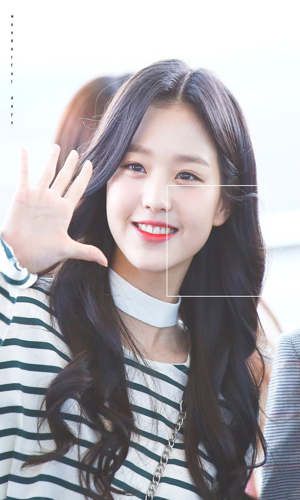

In [123]:
x = draw.rectangle(((500,500),(800,800)), width = 2)
jang.resize((300,500))

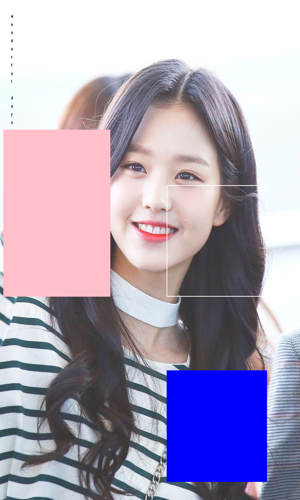

In [126]:
draw.rectangle(((10,350),(330,800)), fill='pink', width = 2) # mutable
jang.resize((300,500))